### Угадываем пол спортсмена

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv( 'athletes.csv' )
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


#### Попробуем угадать пол на основе роста, веса и вида спорта

In [3]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [4]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'height', 'weight', 'sport', 'sex' ] ]
X = pd.get_dummies( selectedColumns, columns = [ 'sport' ] )

del X['sex']

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['sex'] )
y = pd.Series( data = le.transform( data['sex'] ) )

### Строим модель и предсказания predictions

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
model2 = LogisticRegression()
X_train_short, X_test_short, Y_train, Y_test = train_test_split( X, y, test_size = 0.3, random_state = 0 )
model2.fit( X_train_short, Y_train )
predictions = model2.predict_proba( X_test_short )

### По значениям y_test и predictions считаем precision-recall и ROC

In [9]:
from sklearn.metrics import roc_curve, precision_recall_curve

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

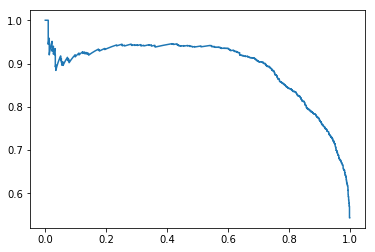

In [11]:
plt.plot( re, pr )

In [17]:
from sklearn.metrics import average_precision_score
average_precision_score( Y_test, predictions[:, 1] )

0.8922134641175142

In [22]:
predictions[:, 1]

array([0.89311157, 0.34933946, 0.69130372, ..., 0.87169016, 0.80173736,
       0.10247551])

In [12]:
from sklearn.metrics import roc_curve

In [13]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

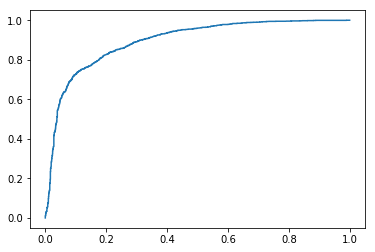

In [14]:
plt.plot( fpr, tpr )

In [15]:
from sklearn.metrics import roc_auc_score

In [16]:
roc_auc_score( Y_test, predictions[:, 1] )

0.8944003912059095